# COVID-19 Data Visualization Project

Goal: to load in the data from the Johns Hopkins COVID-19 Database and create a graph that displays the number of new or cumulative deaths, cases, and recoveries in a given geographical region

### Steps:
1. Load in the data from the Johns Hopkins GitHub using pandas (every time the program is run, we should be using the most recent data from the repo
2. Get the desired graph (bar graph) for deaths, cases, recoveries for various regions. Make it aesthetically pleasing
3. Translate this into a function that does the graphing for us
4. Increase usability! 

In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [265]:
pd.set_option('display.max_columns', None)

## Load in the data from the Johns Hopkins GitHub
Do i have to download it to my local library first? let's see
Do i want a time series or the other csv

### Different csv's
- time_series_covid19_confirmed_US
- time_series_covid19_deaths_US
- time_series_covid19_confirmed_global
- time_series_covid19_deaths_global
- time_series_covid19_recovered_global

In [179]:
url_confirmed_us = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
url_deaths_us = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
url_confirmed_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_deaths_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_recovered_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'


In [180]:
confirmed_us_df = pd.read_csv(url_confirmed_us)

- For the US, FIPS = the Federal Information Processing Standards code that uniquely identifies counties within the USA
- Admin2 = County name. US only
- Combined key could be a good use of the display name for a graph

In [181]:
confirmed_us_df.head()

UID iso2 iso3  code3  FIPS Admin2            Province_State Country_Region  \
0   16   AS  ASM     16  60.0    NaN            American Samoa             US   
1  316   GU  GUM    316  66.0    NaN                      Guam             US   
2  580   MP  MNP    580  69.0    NaN  Northern Mariana Islands             US   
3  630   PR  PRI    630  72.0    NaN               Puerto Rico             US   
4  850   VI  VIR    850  78.0    NaN            Virgin Islands             US   

       Lat     Long_                  Combined_Key  1/22/20  1/23/20  1/24/20  \
0 -14.2710 -170.1320            American Samoa, US        0        0        0   
1  13.4443  144.7937                      Guam, US        0        0        0   
2  15.0979  145.6739  Northern Mariana Islands, US        0        0        0   
3  18.2208  -66.5901               Puerto Rico, US        0        0        0   
4  18.3358  -64.8963            Virgin Islands, US        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
0        0        0        0        0        0        0        0       0   
1        0        0        0        0        0        0        0       0   
2        0        0        0        0        0        0        0       0   
3        0        0        0        0        0        0        0       0   
4        0        0        0        0        0        0        0       0   

   2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
0       0       0       0       0       0       0       0       0        0   
1       0       0       0       0       0       0       0       0        0   
2       0       0       0       0       0       0       0       0        0   
3       0       0       0       0       0       0       0       0        0   
4       0       0       0       0       0       0       0       0        0   

   2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  \
0        0        0        0       0       0       0       0       0       0   
1        0        0        0       0       0       0       0       0       0   
2        0        0        0       0       0       0       0       0       0   
3        0        0        0       0       0       0       0       0       0   
4        0        0        0       0       0       0       0       0       0   

   3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  \
0       0       0       0        0        0        0        0        0   
1       0       0       0        0        0        0        0        0   
2       0       0       0        0        0        0        0        0   
3       0       0       0        0        0        0        0        0   
4       0       0       0        0        0        0        0        0   

   3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  \
0        0        0        0        0        0        0        0        0   
1        0        3        3        5       12       14       15       27   
2        0        0 

In [182]:
confirmed_us_df.tail()

UID iso2 iso3  code3  FIPS          Admin2 Province_State  \
3256  84070016   US  USA    840   NaN    Central Utah           Utah   
3257  84070017   US  USA    840   NaN  Southeast Utah           Utah   
3258  84070018   US  USA    840   NaN  Southwest Utah           Utah   
3259  84070019   US  USA    840   NaN       TriCounty           Utah   
3260  84070020   US  USA    840   NaN    Weber-Morgan           Utah   

     Country_Region        Lat       Long_              Combined_Key  1/22/20  \
3256             US  39.372319 -111.575868    Central Utah, Utah, US        0   
3257             US  38.996171 -110.701396  Southeast Utah, Utah, US        0   
3258             US  37.854472 -111.441876  Southwest Utah, Utah, US        0   
3259             US  40.124915 -109.517442       TriCounty, Utah, US        0   
3260             US  41.271160 -111.914512    Weber-Morgan, Utah, US        0   

      1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  \
3256        0        0        0        0        0        0        0        0   
3257        0        0        0        0        0        0        0        0   
3258        0        0        0        0        0        0        0        0   
3259        0        0        0        0        0        0        0        0   
3260        0        0        0        0        0        0        0        0   

      1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  \
3256        0       0       0       0       0       0       0       0       0   
3257        0       0       0       0       0       0       0       0       0   
3258        0       0       0       0       0       0       0       0       0   
3259        0       0       0       0       0       0       0       0       0   
3260        0       0       0       0       0       0       0       0       0   

      2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  \
3256       0        0        0        0        0        0        0        0   
3257       0        0        0        0        0        0        0        0   
3258       0        0        0        0        0        0        0        0   
3259       0        0        0        0        0        0        0        0   
3260       0        0        0        0        0        0        0        0   

      2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  \
3256        0        0        0        0        0        0        0        0   
3257        0        0        0        0        0        0        0        0   
3258        0        0        0        0        0        0        0        0   
3259        0        0        0        0        0        0        0        0   
3260        0        0        0        0        0        0        0        0   

      2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  \
3256        0        0        0        0        0       0       0       0   
3257        0        0        0        0        0       0       0       0   
3258        0        0        0        0        0       0       0       0   
3259        0        0        0        0        0       0       0       0   
3260        0        0        0        0        0       0       0       0   

      3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  \
3256       0       0       0       0       0       0        0        0   
3257       0       0       0       0       0       0        0        0   
3258       0       0       0       0       0       0        0        0   
3259       0       0       0       0       0       0        0        0   
3260       0       0       0       0       0       0        1        1   

      3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  \
3256        0        0        0        0        0        0        0        0   
3257        0        0        0        0        0        0        0        0   
3258        0      

In [183]:
confirmed_us_df.shape

(3261, 127)

In [184]:
confirmed_us_df.Province_State.value_counts()

Texas                       256
Georgia                     161
Virginia                    135
Kentucky                    122
Missouri                    118
Kansas                      107
Illinois                    104
North Carolina              102
Iowa                        101
Tennessee                    97
Nebraska                     95
Indiana                      94
Ohio                         90
Minnesota                    89
Michigan                     87
Mississippi                  84
Oklahoma                     79
Arkansas                     77
Wisconsin                    74
Pennsylvania                 69
Florida                      69
Alabama                      69
South Dakota                 68
Louisiana                    66
Colorado                     66
New York                     64
California                   60
Montana                      58
West Virginia                57
North Dakota                 55
South Carolina               48
Idaho   

## Looking to group by an entire state

In [ ]:
# format: df.groupby(['col1', 'col2']).agg({'col3':'sum','col4':'sum'})

In [ ]:
# need a function to make the dictionary with all the dates in the format of {'date':'sum'} up until the current date

In [190]:
confirmed_us_df.groupby(['Province_State']).agg({'5/9/20':'sum','5/10/20':'sum','5/11/20':'sum'})

5/9/20  5/10/20  5/11/20
Province_State                                    
Alabama                     9668     9889    10164
Alaska                       378      379      379
American Samoa                 0        0        0
Arizona                    10960    11119    11383
Arkansas                    3747     4012     4043
California                 66558    67600    69329
Colorado                   19375    19703    19879
Connecticut                32984    33554    33765
Delaware                    6277     6277     6565
Diamond Princess              49       49       49
District of Columbia        6102     6272     6389
Florida                    40001    40596    40982
Georgia                    32588    33580    34002
Grand Princess               103      103      103
Guam                         151      151      151
Hawaii                       631      632      634
Idaho                       2205     2230     2260
Illinois                   76085    77741    79007
Indiana                    23732    24126    24627
Iowa                       11671    11959    12373
Kansas                      6829     6951     7159
Kentucky                    6440     6440     6677
Louisiana                  31417    31600    31815
Maine                       1408     1436     1462
Maryland                   31534    32587    33373
Massachusetts              76743    77793    78462
Michigan                   46815    47182    47552
Minnesota                  10790    11271    11799
Mississippi                 9378     9501     9674
Missouri                    9911    10068    10157
Montana                      458      458      459
Nebraska                    8093     8171     8407
Nevada                      6171     6120     6152
New Hampshire               3011     3071     3160
New Jersey                137397   138754   140206
New Mexico                  4778     4863     5069
New York                  333122   335395   337055
North Carolina             14478    14938    15274
North Dakota                1464     1491     1518
Northern Mariana Islands      16       16       19
Ohio                       23697    24081    24777
Oklahoma                    4490     4589     4613
Oregon                      3160     3228     3286
Pennsylvania               58560    59939    60459
Puerto Rico                 2173     2198     2256
Rhode Island               10989    11274    11450
South Carolina              7531     7653     7792
South Dakota                3393     3517     3614
Tennessee                  14768    14985    15544
Texas                      38394    39258    40555
Utah                        6103     6251     6362
Vermont                      921      927      926
Virgin Islands                68       69       69
Virginia                   23196    24081    25070
Washington                 16674    16891    17122
West Virginia               1323     1360     1366
Wisconsin                   9939    10219    10418
Wyoming                      653      662      669

In [185]:
confirmed_us_df.loc[confirmed_us_df['Province_State']=='Colorado']

UID iso2 iso3  code3     FIPS       Admin2 Province_State  \
249   84008001   US  USA    840   8001.0        Adams       Colorado   
250   84008003   US  USA    840   8003.0      Alamosa       Colorado   
251   84008005   US  USA    840   8005.0     Arapahoe       Colorado   
252   84008007   US  USA    840   8007.0    Archuleta       Colorado   
253   84008009   US  USA    840   8009.0         Baca       Colorado   
254   84008011   US  USA    840   8011.0         Bent       Colorado   
255   84008013   US  USA    840   8013.0      Boulder       Colorado   
256   84008014   US  USA    840   8014.0   Broomfield       Colorado   
257   84008015   US  USA    840   8015.0      Chaffee       Colorado   
258   84008017   US  USA    840   8017.0     Cheyenne       Colorado   
259   84008019   US  USA    840   8019.0  Clear Creek       Colorado   
260   84008021   US  USA    840   8021.0      Conejos       Colorado   
261   84008023   US  USA    840   8023.0     Costilla       Colorado   
262   84008025   US  USA    840   8025.0      Crowley       Colorado   
263   84008027   US  USA    840   8027.0       Custer       Colorado   
264   84008029   US  USA    840   8029.0        Delta       Colorado   
265   84008031   US  USA    840   8031.0       Denver       Colorado   
266   84008033   US  USA    840   8033.0      Dolores       Colorado   
267   84008035   US  USA    840   8035.0      Douglas       Colorado   
268   84008037   US  USA    840   8037.0        Eagle       Colorado   
269   84008039   US  USA    840   8039.0       Elbert       Colorado   
270   84008041   US  USA    840   8041.0      El Paso       Colorado   
271   84008043   US  USA    840   8043.0      Fremont       Colorado   
272   84008045   US  USA    840   8045.0     Garfield       Colorado   
273   84008047   US  USA    840   8047.0       Gilpin       Colorado   
274   84008049   US  USA    840   8049.0        Grand       Colorado   
275   84008051   US  USA    840   8051.0     Gunnison       Colorado   
276   84008053   US  USA    840   8053.0     Hinsdale       Colorado   
277   84008055   US  USA    840   8055.0     Huerfano       Colorado   
278   84008057   US  USA    840   8057.0      Jackson       Colorado   
...        ...  ...  ...    ...      ...          ...            ...   
285   84008071   US  USA    840   8071.0   Las Animas       Colorado   
286   84008073   US  USA    840   8073.0      Lincoln       Colorado   
287   84008075   US  USA    840   8075.0        Logan       Colorado   
288   84008077   US  USA    840   8077.0         Mesa       Colorado   
289   84008079   US  USA    840   8079.0      Mineral       Colorado   
290   84008081   US  USA    840   8081.0       Moffat       Colorado   
291   84008083   US  USA    840   8083.0    Montezuma       Colorado   
292   84008085   US  USA    840   8085.0     Montrose       Colorado   
293   84008087   US  USA    840   8087.0       Morgan       Colorado   
294   84008089   US  USA    840   8089.0        Otero       Colorado   
295   84008091   US  USA    840   8091.0        Ouray       Colorado   
296   84008093   US  USA    840   8093.0         Park       Colorado   
297   84008095   US  USA    840   8095.0     Phillips       Colorado   
298   84008097   US  USA    840   8097.0       Pitkin       Colorado   
299   84008099   US  USA    840   8099.0      Prowers       Colorado   
300   84008101   US  USA    840   8101.0       Pueblo       Colorado   
301   84008103   US  USA    840   8103.0   Rio Blanco       Colorado   
302   84008105   US  USA    840   8105.0   Rio Grande       Colorado   
303   84008107   US  USA    840   8107.0        Routt       Colorado   
304   84008109   US  USA    840   8109.0     Saguache       Colorado   
305   84008111   US  USA    840   8111.0     San Juan       Colorado   
306   84008113   US  USA    840   8113.0   San Miguel       Colorado   
307   84008115   US  USA    840   8115.0     Sedgwick       Colorado   
308   84008117   US  USA    840   8117.0       Summ

### We want to transpose the df b/c we want the dates to be the index essentially 
- drop columns that we don't want to be in the transpose (index) first
- columns to save: Country_Region, Province_State, Admin2 (County Name)

In [186]:
conf_us_dropped_cols = confirmed_us_df.drop(['UID','iso2','iso3','code3','FIPS','Lat','Long_'], axis=1)

In [187]:
conf_us_dropped_cols.head()

Admin2            Province_State Country_Region  \
0    NaN            American Samoa             US   
1    NaN                      Guam             US   
2    NaN  Northern Mariana Islands             US   
3    NaN               Puerto Rico             US   
4    NaN            Virgin Islands             US   

                   Combined_Key  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0            American Samoa, US        0        0        0        0        0   
1                      Guam, US        0        0        0        0        0   
2  Northern Mariana Islands, US        0        0        0        0        0   
3               Puerto Rico, US        0        0        0        0        0   
4            Virgin Islands, US        0        0        0        0        0   

   1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  2/2/20  2/3/20  \
0        0        0        0        0        0       0       0       0   
1        0        0        0        0        0       0       0       0   
2        0        0        0        0        0       0       0       0   
3        0        0        0        0        0       0       0       0   
4        0        0        0        0        0       0       0       0   

   2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  \
0       0       0       0       0       0       0        0        0        0   
1       0       0       0       0       0       0        0        0        0   
2       0       0       0       0       0       0        0        0        0   
3       0       0       0       0       0       0        0        0        0   
4       0       0       0       0       0       0        0        0        0   

   2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  \
0        0       0       0       0       0       0       0       0       0   
1        0       0       0       0       0       0       0       0       0   
2        0       0       0       0       0       0       0       0       0   
3        0       0       0       0       0       0       0       0       0   
4        0       0       0       0       0       0       0       0       0   

   3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  \
0       0        0        0        0        0        0        0        0   
1       0        0        0        0        0        0        0        3   
2       0        0        0        0        0        0        0        0   
3       0        0        0        0        0        0        0        5   
4       0        0        0        0        0        0        0        1   

   3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  \
0        0        0        0        0        0        0        0        0   
1        3        5       12       14       15       27       29       32   
2        0        0        0        0        0        0        0        0   
3        5        5        5       14       21       23       31       39   
4        2        2        3        3  

### Boulder county

In [188]:
conf_us_dropped_cols[conf_us_dropped_cols['Admin2']=='Boulder']

Admin2 Province_State Country_Region           Combined_Key  1/22/20  \
255  Boulder       Colorado             US  Boulder, Colorado, US        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  \
255        0        0        0        0        0        0        0        0   

     1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  \
255        0       0       0       0       0       0       0       0       0   

     2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  \
255       0        0        0        0        0        0        0        0   

     2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  \
255        0        0        0        0        0        0        0        0   

     2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  \
255        0        0        0        0        0       0       0       0   

     3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  \
255       0       0       0       0       0       0        0        0   

     3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  \
255        0        1        0        0        7       11       11       11   

     3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  \
255       16       30       37       39       39       49       66       66   

     3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  \
255       76       90       90      107     107     114     132     143   

     4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  \
255     177     189     206     207     207      217      234      264   

     4/13/20  4/14/20  4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  \
255      284      293      299      300      312      327      352      352   

     4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  \
255      390      417      426      470      497      500      515      543   

     4/29/20  4/30/20  5/1/20  5/2/20  5/3/20  5/4/20  5/5/20  5/6/20  5/7/20  \
255      565      580     618     646     661     679     685     700     720   

     5/8/20  5/9/20  5/10/20  5/11/20  5/12/20  5/13/20  5/14/20  5/15/20  \
255     743     757      767      777      788      797      805      825   

     5/16/20  
255      835

## New idea
- instead of using a pivot table, we use the Province_State and Admin2 name straight from the normal table (after initial columns have been dropped?)
- then once only the rows corresponding to the specific county have been selected, then we transpose and plot 

In [135]:
autauga = conf_us_dropped_cols[(conf_us_dropped_cols['Province_State'] == 'Alabama') & (conf_us_dropped_cols['Admin2'] == 'Autauga')]

### If we only want to see the last 30 days we use .tail(30)

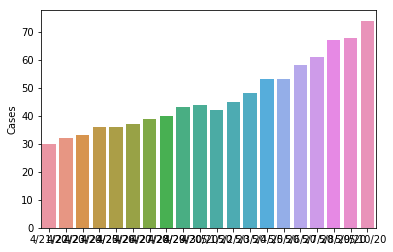

In [175]:
sns.barplot(x=county_graph_ready.index[-20:],y=county_graph_ready.Cases[-20:],data=county_graph_ready)

# Function that plots the # of total cases over the last X amt of days for a given STATE AND COUNTY
- starting with the entire dataframe extracted from John's Hopkins website to the graph

In [192]:
confirmed_us_df.head()

UID iso2 iso3  code3  FIPS Admin2            Province_State Country_Region  \
0   16   AS  ASM     16  60.0    NaN            American Samoa             US   
1  316   GU  GUM    316  66.0    NaN                      Guam             US   
2  580   MP  MNP    580  69.0    NaN  Northern Mariana Islands             US   
3  630   PR  PRI    630  72.0    NaN               Puerto Rico             US   
4  850   VI  VIR    850  78.0    NaN            Virgin Islands             US   

       Lat     Long_                  Combined_Key  1/22/20  1/23/20  1/24/20  \
0 -14.2710 -170.1320            American Samoa, US        0        0        0   
1  13.4443  144.7937                      Guam, US        0        0        0   
2  15.0979  145.6739  Northern Mariana Islands, US        0        0        0   
3  18.2208  -66.5901               Puerto Rico, US        0        0        0   
4  18.3358  -64.8963            Virgin Islands, US        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
0        0        0        0        0        0        0        0       0   
1        0        0        0        0        0        0        0       0   
2        0        0        0        0        0        0        0       0   
3        0        0        0        0        0        0        0       0   
4        0        0        0        0        0        0        0       0   

   2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
0       0       0       0       0       0       0       0       0        0   
1       0       0       0       0       0       0       0       0        0   
2       0       0       0       0       0       0       0       0        0   
3       0       0       0       0       0       0       0       0        0   
4       0       0       0       0       0       0       0       0        0   

   2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  \
0        0        0        0       0       0       0       0       0       0   
1        0        0        0       0       0       0       0       0       0   
2        0        0        0       0       0       0       0       0       0   
3        0        0        0       0       0       0       0       0       0   
4        0        0        0       0       0       0       0       0       0   

   3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  \
0       0       0       0        0        0        0        0        0   
1       0       0       0        0        0        0        0        0   
2       0       0       0        0        0        0        0        0   
3       0       0       0        0        0        0        0        0   
4       0       0       0        0        0        0        0        0   

   3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  \
0        0        0        0        0        0        0        0        0   
1        0        3        3        5       12       14       15       27   
2        0        0 

### Clean the data (drop columns from original dataframe)

In [200]:
state_county = confirmed_us_df.drop(['UID','Country_Region','iso2','iso3','code3','FIPS','Lat','Long_'], axis=1)

In [201]:
state_county.head()

Admin2            Province_State                  Combined_Key  1/22/20  \
0    NaN            American Samoa            American Samoa, US        0   
1    NaN                      Guam                      Guam, US        0   
2    NaN  Northern Mariana Islands  Northern Mariana Islands, US        0   
3    NaN               Puerto Rico               Puerto Rico, US        0   
4    NaN            Virgin Islands            Virgin Islands, US        0   

   1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  \
0        0       0       0       0       0       0       0       0       0   
1        0       0       0       0       0       0       0       0       0   
2        0       0       0       0       0       0       0       0       0   
3        0       0       0       0       0       0       0       0       0   
4        0       0       0       0       0       0       0       0       0   

   2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  \
0       0        0        0        0        0        0        0        0   
1       0        0        0        0        0        0        0        0   
2       0        0        0        0        0        0        0        0   
3       0        0        0        0        0        0        0        0   
4       0        0        0        0        0        0        0        0   

   2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  \
0        0        0        0        0        0       0       0       0   
1        0        0        0        0        0       0       0       0   
2        0        0        0        0        0       0       0       0   
3        0        0        0        0        0       0       0       0   
4        0        0        0        0        0       0       0       0   

   3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  \
0       0       0       0       0       0       0        0        0        0   
1       0       0       0       0       0       0        0        0        0   
2       0       0       0       0       0       0        0        0        0   
3       0       0       0       0       0       0        0        0        0   
4       0       0       0       0       0       0        0        0        0   

   3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        3        3        5       12       14   
2        0        0        0        0        0        0        0        0   
3        0        0        0        5        5        5        5       14   
4        0        0        0        1        2        2        3        3   

   3/21/20  3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  \
0        0        0        0        0        0        0        0        0   
1       15       27       29       32       37       45       51       55   
2        0        0        0        0        0        0        0   

## Function to create county dataframe (county_df)
### General format to select a state and County
- county_df = state_county[(state_county['Province_State'] == '<state_name>') & (state_county['Admin2'] == '<county_name')]

In [ ]:
autauga = conf_us_dropped_cols[(conf_us_dropped_cols['Province_State'] == 'Alabama') & (conf_us_dropped_cols['Admin2'] == 'Autauga')]

In [202]:
def select_county(state,county):
    """
    Generates a dataframe that consists of one row: 
    :state: state of choice
    :county: county of choice
    """
    county_df = state_county[(state_county['Province_State'] == state) & (state_county['Admin2'] == county)]
                  
    return county_df

In [203]:
boulder_df = select_county('Colorado','Boulder')

In [204]:
boulder_df

Admin2 Province_State           Combined_Key  1/22/20  1/23/20  1/24/20  \
255  Boulder       Colorado  Boulder, Colorado, US        0        0        0   

     1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
255        0        0        0        0        0        0        0       0   

     2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
255       0       0       0       0       0       0       0       0        0   

     2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  \
255        0        0        0        0        0        0        0        0   

     2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  \
255        0        0        0        0        0        0        0        0   

     2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  \
255        0        0        0       0       0       0       0       0   

     3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  \
255       0       0       0       0        0        0        0        1   

     3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  \
255        0        0        7       11       11       11       16       30   

     3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  \
255       37       39       39       49       66       66       76       90   

     3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  \
255       90      107     107     114     132     143     177     189     206   

     4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  4/15/20  \
255     207     207      217      234      264      284      293      299   

     4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  \
255      300      312      327      352      352      390      417      426   

     4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  5/1/20  \
255      470      497      500      515      543      565      580     618   

     5/2/20  5/3/20  5/4/20  5/5/20  5/6/20  5/7/20  5/8/20  5/9/20  5/10/20  \
255     646     661     679     685     700     720     743     757      767   

     5/11/20  5/12/20  5/13/20  5/14/20  5/15/20  5/16/20  
255      777      788      797      805      825      835

## Write graphing function for barplot
- start off using boulder_df 
- can use Combined_Key input for title of graph
- input: the dataframe you want to use; number of days 
- output: dank graph 
### NEXT: function will take in 
- state and city 
- then do the graphing 

In [227]:
state_county.head()

Admin2            Province_State                  Combined_Key  1/22/20  \
0    NaN            American Samoa            American Samoa, US        0   
1    NaN                      Guam                      Guam, US        0   
2    NaN  Northern Mariana Islands  Northern Mariana Islands, US        0   
3    NaN               Puerto Rico               Puerto Rico, US        0   
4    NaN            Virgin Islands            Virgin Islands, US        0   

   1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  \
0        0       0       0       0       0       0       0       0       0   
1        0       0       0       0       0       0       0       0       0   
2        0       0       0       0       0       0       0       0       0   
3        0       0       0       0       0       0       0       0       0   
4        0       0       0       0       0       0       0       0       0   

   2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  \
0       0        0        0        0        0        0        0        0   
1       0        0        0        0        0        0        0        0   
2       0        0        0        0        0        0        0        0   
3       0        0        0        0        0        0        0        0   
4       0        0        0        0        0        0        0        0   

   2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  \
0        0        0        0        0        0       0       0       0   
1        0        0        0        0        0       0       0       0   
2        0        0        0        0        0       0       0       0   
3        0        0        0        0        0       0       0       0   
4        0        0        0        0        0       0       0       0   

   3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  \
0       0       0       0       0       0       0        0        0        0   
1       0       0       0       0       0       0        0        0        0   
2       0       0       0       0       0       0        0        0        0   
3       0       0       0       0       0       0        0        0        0   
4       0       0       0       0       0       0        0        0        0   

   3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        3        3        5       12       14   
2        0        0        0        0        0        0        0        0   
3        0        0        0        5        5        5        5       14   
4        0        0        0        1        2        2        3        3   

   3/21/20  3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  \
0        0        0        0        0        0        0        0        0   
1       15       27       29       32       37       45       51       55   
2        0        0        0        0        0        0        0   

In [235]:
state_county.rename(columns={'Admin2':'County'},inplace=True)

In [236]:
state_county.head()

County            Province_State                  Combined_Key  1/22/20  \
0    NaN            American Samoa            American Samoa, US        0   
1    NaN                      Guam                      Guam, US        0   
2    NaN  Northern Mariana Islands  Northern Mariana Islands, US        0   
3    NaN               Puerto Rico               Puerto Rico, US        0   
4    NaN            Virgin Islands            Virgin Islands, US        0   

   1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  \
0        0       0       0       0       0       0       0       0       0   
1        0       0       0       0       0       0       0       0       0   
2        0       0       0       0       0       0       0       0       0   
3        0       0       0       0       0       0       0       0       0   
4        0       0       0       0       0       0       0       0       0   

   2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  \
0       0        0        0        0        0        0        0        0   
1       0        0        0        0        0        0        0        0   
2       0        0        0        0        0        0        0        0   
3       0        0        0        0        0        0        0        0   
4       0        0        0        0        0        0        0        0   

   2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  \
0        0        0        0        0        0       0       0       0   
1        0        0        0        0        0       0       0       0   
2        0        0        0        0        0       0       0       0   
3        0        0        0        0        0       0       0       0   
4        0        0        0        0        0       0       0       0   

   3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  \
0       0       0       0       0       0       0        0        0        0   
1       0       0       0       0       0       0        0        0        0   
2       0       0       0       0       0       0        0        0        0   
3       0       0       0       0       0       0        0        0        0   
4       0       0       0       0       0       0        0        0        0   

   3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        3        3        5       12       14   
2        0        0        0        0        0        0        0        0   
3        0        0        0        5        5        5        5       14   
4        0        0        0        1        2        2        3        3   

   3/21/20  3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  \
0        0        0        0        0        0        0        0        0   
1       15       27       29       32       37       45       51       55   
2        0        0        0        0        0        0        0   

In [242]:
def graph_county(state, county, num_days=30):
    """
    Function that will plot the cumulative number of cases over the last N number of days 
    :state: state of choice
    :county: county of choice
    :num_days: number of days for graph to display, default set to 30
    """
    # Read in the file from Johns Hopkins and load into pandas
    url_confirmed_us = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
    confirmed_us_df = pd.read_csv(url_confirmed_us)
    # drop columns not needed for graphing 
    state_county = confirmed_us_df.drop(['UID','Country_Region','iso2','iso3','code3','FIPS','Lat','Long_'], axis=1)
    # rename column 'Admin2' to 'County'
    state_county.rename(columns={'Admin2':'County'},inplace=True)
    
    # Generate a dataframe that consists of one row for the specified county
    county_df = state_county[(state_county['Province_State'] == state) & (state_county['County'] == county)]
    
    # drop columns and transpose the dataframe
    county_df = county_df.drop(['County', 'Province_State','Combined_Key'], axis=1)
    county_df = county_df.reset_index(drop=True)
    county_df.rename(index={0:'Cases'},inplace=True)
    county_df = county_df.T
    
    # graphing
    county_df.tail(30).plot(kind='bar',figsize=(18.5, 10.5))
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    title = 'Number of Cases Over the Last ' + str(num_days) + ' Days in ' + county + ', ' + state 
    plt.title(title)
    plt.legend().remove()
    plt.xticks(rotation=40)
    
    
    return county_df

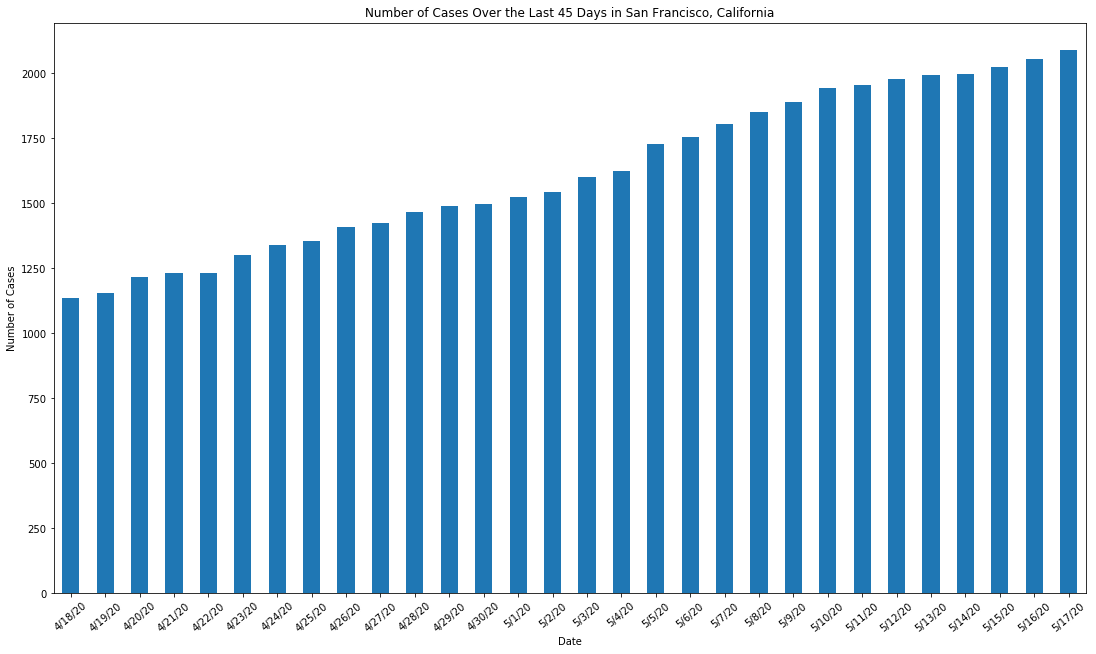

In [270]:
test_df = graph_county('California','San Francisco',num_days=45)

In [209]:
test_df.head()

Cases
1/22/20      0
1/23/20      0
1/24/20      0
1/25/20      0
1/26/20      0

## This is the code we want to use for the function

In [248]:
county_graph_ready.head()

Cases
1/22/20      0
1/23/20      0
1/24/20      0
1/25/20      0
1/26/20      0

In [249]:
county_graph_ready['Cases'][:10]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
1/27/20    0
1/28/20    0
1/29/20    0
1/30/20    0
1/31/20    0
Name: Cases, dtype: int64

## Figuring out how to label the bar chart with values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

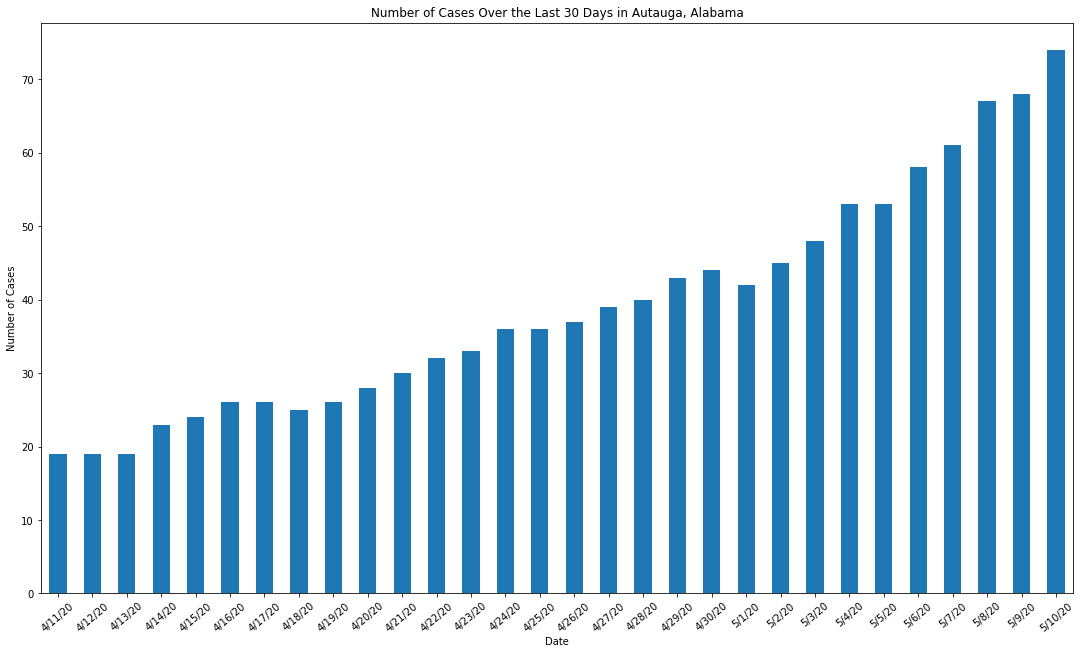

In [263]:
ax = county_graph_ready.tail(30).plot(kind='bar',figsize=(18.5, 10.5))
ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.set_title('Number of Cases Over the Last 30 Days in Autauga, Alabama')
ax.legend().remove()
plt.xticks(rotation=40)
# for i, v in enumerate(county_graph_ready['Cases'].tail(30)):
#     ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

NameError: name 'ax' is not defined

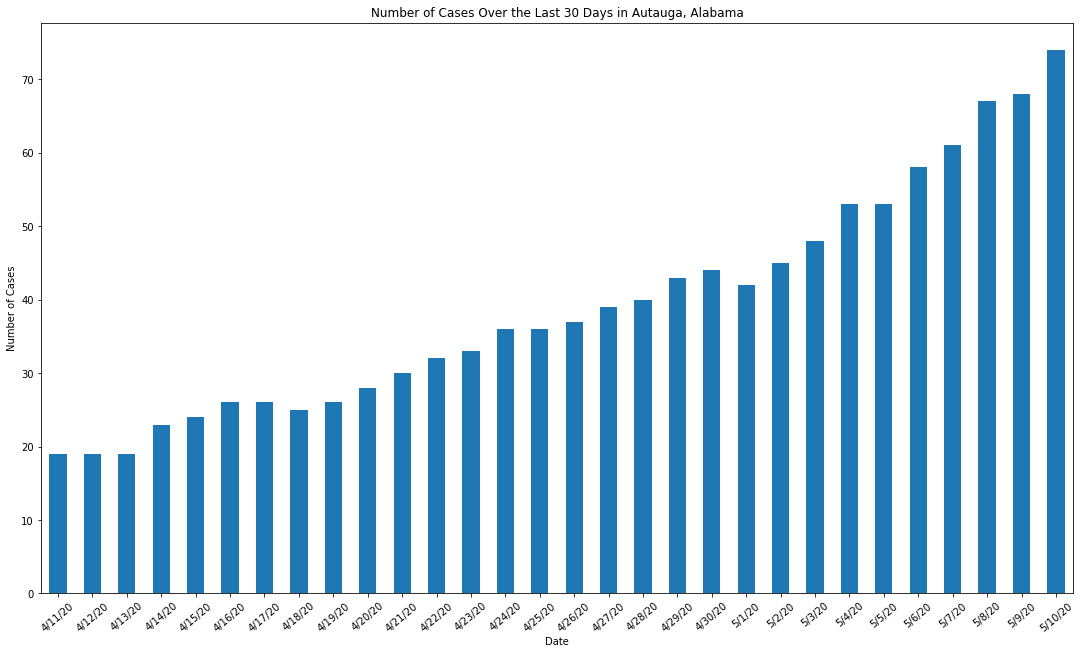

In [250]:
county_graph_ready.tail(30).plot(kind='bar',figsize=(18.5, 10.5))
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Number of Cases Over the Last 30 Days in Autauga, Alabama')
plt.legend().remove()
plt.xticks(rotation=40)
for i, v in enumerate(county_graph_ready['Cases']):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

### drop the columns that aren't the date 

In [136]:
county_df = autauga.drop(['Admin2', 'Province_State','Country_Region','Combined_Key'], axis=1)

In [162]:
county_df = county_df.reset_index(drop=True)

In [163]:
county_df.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0        0        0        0        0        0        0        0        0   

   1/30/20  1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  \
0        0        0       0       0       0       0       0       0       0   

   2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  \
0       0       0        0        0        0        0        0        0   

   2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  \
0        0        0        0        0        0        0        0        0   

   2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  \
0        0        0        0        0        0        0       0       0   

   3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  \
0       0       0       0       0       0       0       0        0        0   

   3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  \
0        0        0        0        0        0        0        0        0   

   3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  \
0        0        0        0        0        1        4        6        6   

   3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  \
0        6        6        6        7       8      10      12      12      12   

   4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  \
0      12      12      12      15       17       19       19       19   

   4/14/20  4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  \
0       23       24       26       26       25       26       28       30   

   4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  \
0       32       33       36       36       37       39       40       43   

   4/30/20  5/1/20  5/2/20  5/3/20  5/4/20  5/5/20  5/6/20  5/7/20  5/8/20  \
0       44      42      45      48      53      53      58      61      67   

   5/9/20  5/10/20  
0      68       74

## now we reset the index from 0 to "Cases"

In [168]:
county_df.rename(index={0:'Cases'},inplace=True)

In [169]:
county_df.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
Cases        0        0        0        0        0        0        0        0   

       1/30/20  1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  \
Cases        0        0       0       0       0       0       0       0   

       2/7/20  2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  \
Cases       0       0       0        0        0        0        0        0   

       2/15/20  2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  \
Cases        0        0        0        0        0        0        0        0   

       2/23/20  2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  \
Cases        0        0        0        0        0        0        0       0   

       3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  \
Cases       0       0       0       0       0       0       0       0   

       3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  \
Cases        0        0        0        0        0        0        0        0   

       3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  3/25/20  \
Cases        0        0        0        0        0        0        1        4   

       3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  \
Cases        6        6        6        6        6        7       8      10   

       4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  \
Cases      12      12      12      12      12      12      15       17   

       4/11/20  4/12/20  4/13/20  4/14/20  4/15/20  4/16/20  4/17/20  4/18/20  \
Cases       19       19       19       23       24       26       26       25   

       4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  \
Cases       26       28       30       32       33       36       36       37   

       4/27/20  4/28/20  4/29/20  4/30/20  5/1/20  5/2/20  5/3/20  5/4/20  \
Cases       39       40       43       44      42      45      48      53   

       5/5/20  5/6/20  5/7/20  5/8/20  5/9/20  5/10/20  
Cases      53      58      61      67      68       74

In [170]:
county_graph_ready = county_df.T

In [171]:
county_graph_ready.head()

Cases
1/22/20      0
1/23/20      0
1/24/20      0
1/25/20      0
1/26/20      0

In [172]:
county_graph_ready.columns

Index(['Cases'], dtype='object')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109]),
 <a list of 110 Text xticklabel objects>)

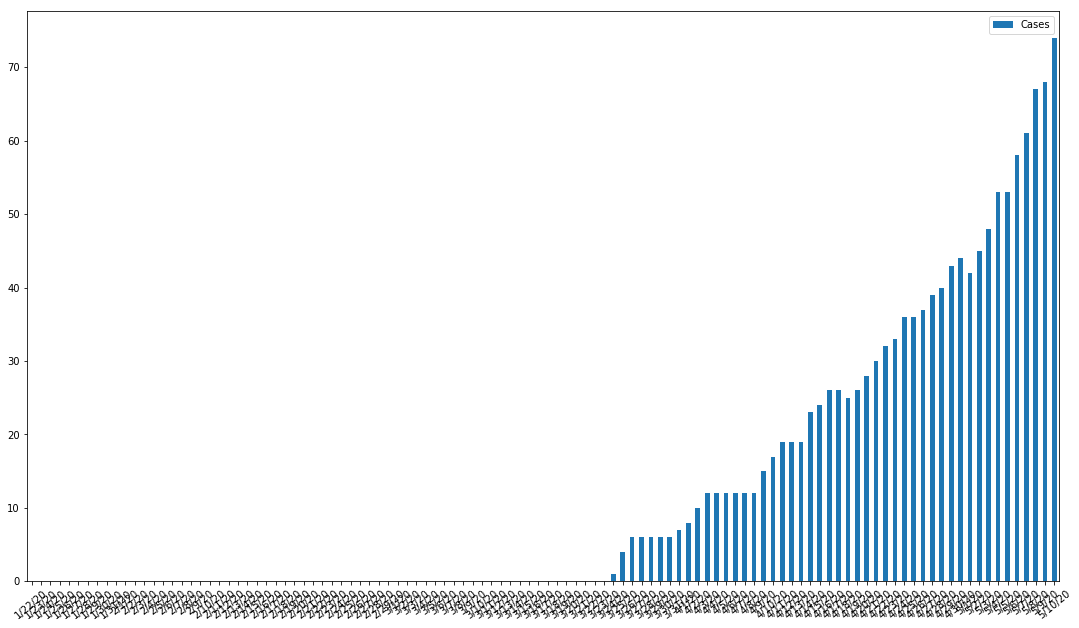

In [173]:
county_graph_ready.plot(kind='bar',figsize=(18.5, 10.5))
plt.xticks(rotation=40)

## What i initially tried -- transposing the larger df

In [76]:
conf_us_transposed = conf_us_dropped_cols.T

In [125]:
conf_us_transposed.head(20)

0         1                             2     \
Admin2                         NaN       NaN                           NaN   
Province_State      American Samoa      Guam      Northern Mariana Islands   
Country_Region                  US        US                            US   
Combined_Key    American Samoa, US  Guam, US  Northern Mariana Islands, US   
1/22/20                          0         0                             0   
1/23/20                          0         0                             0   
1/24/20                          0         0                             0   
1/25/20                          0         0                             0   
1/26/20                          0         0                             0   
1/27/20                          0         0                             0   
1/28/20                          0         0                             0   
1/29/20                          0         0                             0   
1/30/20                          0         0                             0   
1/31/20                          0         0                             0   
2/1/20                           0         0                             0   
2/2/20                           0         0                             0   
2/3/20                           0         0                             0   
2/4/20                           0         0                             0   
2/5/20                           0         0                             0   
2/6/20                           0         0                             0   

                           3                   4                     5     \
Admin2                      NaN                 NaN               Autauga   
Province_State      Puerto Rico      Virgin Islands               Alabama   
Country_Region               US                  US                    US   
Combined_Key    Puerto Rico, US  Virgin Islands, US  Autauga, Alabama, US   
1/22/20                       0                   0                     0   
1/23/20                       0                   0                     0   
1/24/20                       0                   0                     0   
1/25/20                       0                   0                     0   
1/26/20                       0                   0                     0   
1/27/20                       0                   0                     0   
1/28/20                       0                   0                     0   
1/29/20                       0                   0                     0   
1/30/20                       0                   0                     0   
1/31/20                       0                   0                     0   
2/1/20                        0                   0                     0   
2/2/20                        0                   0                     0   
2/3/20                        0                   0                     0   
2/4/20                        0                   0                     0   
2/5/20                        0                   0                     0   
2/6/20                        0                   0                     0   

                                6                     7                  8     \
Admin2                       Baldwin               Barbour               Bibb   
Province_State               Alabama               Alabama            Alabama   
Country_Region                    US                    US                 US   
Combined_Key    Baldwin, Alabama, US  Barbour, Alabama, US  Bibb, Alabama, US   
1/22/20                            0                     0                  0   
1/23/20                            0                     0                  0   
1/24/20                            0                     0                  0   
1/25/20                            0                     0                  0   
1/26/20                            0        

## Make a pivot table?
- columns are the date columns
- index is state and county?

In [89]:
us_conf_pivot = pd.pivot_table(conf_us_dropped_cols,index=['Province_State','Admin2'])

### Dates of the pivot table are messed up
- something went wrong in the conversion to pivot table

In [90]:
us_conf_pivot

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
Province_State Admin2                                                     
Alabama        Autauga            0        0        0        0        0   
               Baldwin            0        0        0        0        0   
               Barbour            0        0        0        0        0   
               Bibb               0        0        0        0        0   
               Blount             0        0        0        0        0   
               Bullock            0        0        0        0        0   
               Butler             0        0        0        0        0   
               Calhoun            0        0        0        0        0   
               Chambers           0        0        0        0        0   
               Cherokee           0        0        0        0        0   
               Chilton            0        0        0        0        0   
               Choctaw            0        0        0        0        0   
               Clarke             0        0        0        0        0   
               Clay               0        0        0        0        0   
               Cleburne           0        0        0        0        0   
               Coffee             0        0        0        0        0   
               Colbert            0        0        0        0        0   
               Conecuh            0        0        0        0        0   
               Coosa              0        0        0        0        0   
               Covington          0        0        0        0        0   
               Crenshaw           0        0        0        0        0   
               Cullman            0        0        0        0        0   
               Dale               0        0        0        0        0   
               Dallas             0        0        0        0        0   
               DeKalb             0        0        0        0        0   
               Elmore             0        0        0        0        0   
               Escambia           0        0        0        0        0   
               Etowah             0        0        0        0        0   
               Fayette            0        0        0        0        0   
               Franklin           0        0        0        0        0   
...                             ...      ...      ...      ...      ...   
Wisconsin      Waukesha           0        0        0        0        0   
               Waupaca            0        0        0        0        0   
               Waushara           0        0        0        0        0   
               Winnebago          0        0        0        0        0   
               Wood               0        0        0        0        0   
Wyoming        Albany             0        0        0        0        0   
               Big Horn           0        0        0        0        0   
               Campbell           0        0        0        0        0   
               Carbon             0        0        0        0        0   
               Converse           0        0        0        0        0   
               Crook              0        0        0        0        0   
               Fremont            0        0        0        0        0   
               Goshen             0        0        0        0        0   
               Hot Springs        0        0        0        0        0   
               Johnson            0        0        0        0        0   
               Laramie            0        0        0        0        0   
               Lincoln            0        0        0        0        0   
               Natrona            0        0        0        0        0   
               Niobrara           0        0        0        0        0   
               Out of WY          0        0        0        0        0   
               Park               0        0        0

### How to index this pivot table: 
e.g. if you wanted to get the county ('Admin2') Autauga from 'Province_State' Alabama, you write this command
- us_conf_pivot.loc[('Alabama','Autauga')]

In [101]:
autauga = us_conf_pivot.loc[('Alabama','Autauga')].to_frame()

In [108]:
autauga.columns

MultiIndex(levels=[['Alabama'], ['Autauga']],
           labels=[[0], [0]])

In [106]:
autauga.head()

Alabama
        Autauga
1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       0

In [117]:
# df[-n:] --> gets the last n rows of the dataframe (probably same as tail)
autauga[-3:]

Alabama
       Autauga
5/7/20      61
5/8/20      67
5/9/20      68

In [121]:
autauga.tail(20)

Alabama
        Autauga
4/28/20      40
4/29/20      43
4/3/20       12
4/30/20      44
4/4/20       12
4/5/20       12
4/6/20       12
4/7/20       12
4/8/20       12
4/9/20       15
5/1/20       42
5/10/20      74
5/2/20       45
5/3/20       48
5/4/20       53
5/5/20       53
5/6/20       58
5/7/20       61
5/8/20       67
5/9/20       68

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

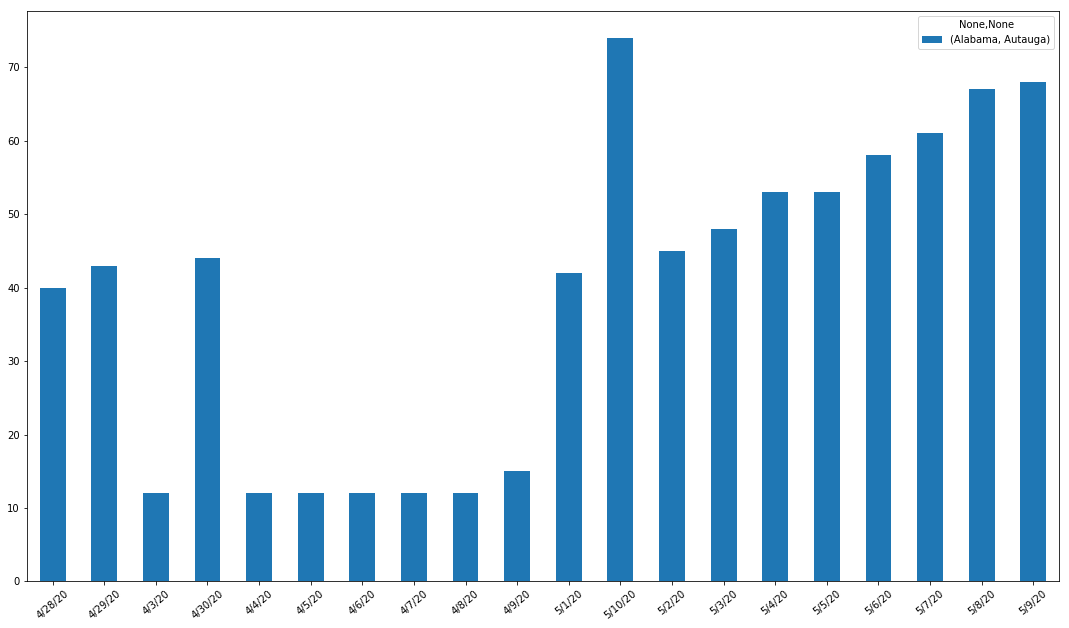

In [119]:
autauga.tail(20).plot(kind='bar',figsize=(18.5, 10.5))
plt.xticks(rotation=40)
#plt.figsize(18.5, 10.5)

In [109]:
sns.barplot()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

TypeError: <lambda>() missing 1 required positional argument: 'height'

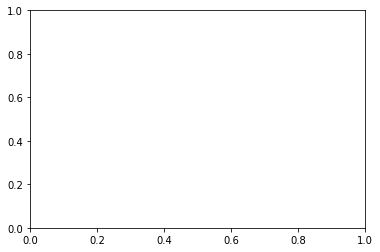

In [97]:
plt.bar(us_conf_pivot.loc[('Alabama','Autauga')])

### Looking at which states have the most confirmed cases

In [57]:
groupby_state = confirmed_us_df.groupby(['Province_State','5/10/20']).sum().reset_index().sort_values(by='5/10/20', ascending=False)

In [60]:
groupby_state.Province_State.value_counts()

Georgia                     117
Texas                        94
Virginia                     83
North Carolina               78
Indiana                      77
Mississippi                  73
Ohio                         69
Michigan                     67
Tennessee                    65
Florida                      64
Illinois                     64
Pennsylvania                 63
Alabama                      61
Louisiana                    60
New York                     57
Minnesota                    55
Kentucky                     54
California                   52
Iowa                         52
Missouri                     48
Arkansas                     46
Colorado                     46
South Carolina               45
Oklahoma                     45
Wisconsin                    43
Kansas                       36
Nebraska                     36
Washington                   33
West Virginia                30
New Mexico                   26
Maryland                     25
Oregon  

In [59]:
groupby_state.head(25)

Province_State  5/10/20       UID  code3     FIPS        Lat       Long_  \
1284       New York   184417  84036061    840  36061.0  40.767273  -73.971526   
523        Illinois    52655  84017031    840  17031.0  41.841448  -87.816588   
1283       New York    38217  84036059    840  36059.0  40.740665  -73.589419   
1282       New York    36702  84036103    840  36103.0  40.883201  -72.801217   
184      California    31703  84006037    840   6037.0  34.308284 -118.228241   
1281       New York    31294  84036119    840  36119.0  41.162784  -73.757417   
1584   Pennsylvania    18211  84042101    840  42101.0  40.003385  -75.137927   
926        Michigan    18075  84026163    840  26163.0  42.280984  -83.281255   
859   Massachusetts    17589  84025017    840  25017.0  42.486077  -71.390492   
1201     New Jersey    17513  84034017    840  34017.0  40.737662  -74.075157   
1200     New Jersey    16929  84034003    840  34003.0  40.960109  -74.071643   
1199     New Jersey    15646  84034013    840  34013.0  40.786813  -74.246580   
858   Massachusetts    15279  84025025    840  25025.0  42.327951  -71.078504   
1198     New Jersey    14543  84034031    840  34031.0  41.032386  -74.299541   
1197     New Jersey    14057  84034039    840  34039.0  40.658354  -74.306801   
312         Florida    14007  84012086    840  12086.0  25.611236  -80.551706   
1196     New Jersey    13937  84034023    840  34023.0  40.436299  -74.414270   
240     Connecticut    13236  84009001    840   9001.0  41.268099  -73.388117   
1280       New York    12451  84036087    840  36087.0  41.150279  -74.025605   
857   Massachusetts    11353  84025009    840  25009.0  42.668763  -70.946872   
1279       New York     9543  84036071    840  36071.0  41.403375  -74.302408   
844        Maryland     9496  84024033    840  24033.0  38.830700  -76.849644   
239     Connecticut     9209  84009009    840   9009.0  41.408032  -72.936204   
1816          Texas     7878  84048201    840  48201.0  29.858649  -95.393395   
856   Massachusetts     7743  84025027    840  25027.0  42.350270  -71.904934   

      1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
1284        0        0        0        0        0        0        0        0   
523         0        0        1        1        1        1        1        1   
1283        0        0        0        0        0        0        0        0   
1282        0        0        0        0        0        0        0        0   
184         0        0        0        0        1        1        1        1   
1281        0        0        0        0        0        0        0        0   
1584        0        0        0        0        0        0        0        0   
926         0        0        0        0        0        0        0        0   
859         0        0        0        0        0        0        0        0   
1201        0        0        0        0        0        0        0        0   
1200        0        0        0        0        0        0        0        0   
1199        0        0        0        0        0        0        0        0   
858         0        0        0        0        0        0        0        0   
1198        0        0        0        0        0        0        0        0   
1197        0        0        0        0        0        0        0        0   
312         0        0        0        0        0        0        0        0   
1196        0        0        0        0        0        0        0        0   
240         0        0        0        0        0        0        0        0   
1280        0        0        0        0        0        0        0        0   
857         0        0        0        0        0        0        0        0   
1279        0        0        0        0        0        0        0        0   
844         0        0        0        0        0        0        0        0   
239         0        0        0        0        0        0